In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_SIZE_MONTHLY_AVERAGE.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

## **전체기간 총 상장 주식 수는 5015개**

In [3]:
stock_name_ls = raw_rt.iloc[1,1:].tolist()

In [4]:
len(stock_name_ls)

5015

## **보통주만 선별하는 작업 필요**

In [5]:
stock_name_ls[:10]

['조흥은행',
 '조흥은행(1신)',
 '조흥은행(2신)',
 '동화약품',
 '동화약품공업(1신)',
 '동화약품(전환1신)',
 '동화약품(전환2신)',
 '우리은행',
 '한빛은행(1신)',
 '한국상업은행(2신)']

## **Raw 데이터에 문제가 있는 16개 기업 제거**

In [6]:
error_stock_ls = ['삼성물산','알루코','하나은행','두산건설','SK',
                  '고려시멘트','광주은행','경남은행','신성이엔지',
                  '현대리바트','세원','풀무원','국민은행','핸디소프트',
                  '아이티센', '에스와이코퍼레이션']

In [7]:
stock_name_ls = [x for x in stock_name_ls if not x in error_stock_ls]

In [8]:
def clean_uncommon_stocks(stock_name_ls):
    # (1신) 꼴 제거
    unwanted_word_ls = ['(', '1신', '2신', '3신','4신','우B','우C','1','2','3','우선','스팩']
    
    for unwanted_word in unwanted_word_ls:
        stock_name_ls = [x for x in stock_name_ls if not unwanted_word in x]
    
    stock_name_ls = [x for x in stock_name_ls if not x[-1] == '우']
    return stock_name_ls

## **최종적으로 선정된 주식의 수는 2900개**

In [9]:
common_stock_ls = clean_uncommon_stocks(stock_name_ls)
len(common_stock_ls)

2900

# 성과지표 데이터프레임 전처리 수행

In [10]:
per_df = Ko.Preprocessing(raw_per, column = '기업명', drop_limit=0)
per_df = per_df.loc[common_stock_ls]

In [11]:
len(per_df)

2900

# 수익률 DF 전처리

In [12]:
rt_df = Ko.Preprocessing(raw_rt, column = '기업명', drop_limit=0).apply(lambda x: Ko.rt_transform(x), axis = 1)

rt_df = rt_df.loc[common_stock_ls]
rt_df = rt_df.iloc[:, :-1]

In [13]:
rt_df

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
조흥은행,0.9060,0.9407,0.9528,0.8512,1.1845,0.8607,1.0190,0.8458,0.9668,1.3143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
동화약품,1.0695,0.9652,0.9279,0.8980,0.9734,0.8608,0.9161,1.0285,1.0138,1.0540,...,1.1652,0.9466,1.1077,1.0556,1.0746,0.9429,0.9913,0.8908,1.0833,1.0498
우리은행,0.9000,0.9407,0.9528,0.8595,1.1827,0.8537,1.0190,0.8411,0.9778,1.3182,...,0.9878,0.9722,1.0698,0.9852,0.8825,1.0956,0.9533,1.0654,1.0368,0.9645
KR모터스,1.1000,0.9870,0.9474,0.8056,1.1552,0.7985,0.9533,0.8431,0.8488,1.3014,...,0.8586,0.9368,1.2924,0.8877,1.0285,1.1560,1.0825,0.8352,0.9701,1.0034
경방,1.0000,1.0000,1.0000,0.9918,1.0146,1.0019,0.9918,1.0020,1.0023,0.9977,...,0.9381,1.0183,1.0432,0.9690,1.0000,1.0605,0.8758,1.0613,0.9206,1.0784
메리츠화재,0.9906,0.9048,0.8623,0.8031,1.0238,0.7525,1.0858,0.8004,0.9186,1.3035,...,1.0000,0.9144,1.0596,0.9177,0.9212,0.9952,0.9785,0.9366,0.9583,0.9918
삼양홀딩스,1.0652,1.0051,0.9696,0.8062,1.0844,0.8683,0.8759,1.1182,1.1408,0.9445,...,1.1338,1.1902,0.9959,0.9177,0.8789,1.1327,1.0315,1.0393,0.9580,0.8947
하이트진로,1.0331,1.0080,0.9683,0.9221,1.0044,0.8982,0.9606,1.1077,1.0046,0.9816,...,0.8910,1.0169,0.9544,0.9565,1.0205,0.9710,0.9243,0.9752,0.9262,0.9231
두산상사,1.1026,0.9767,0.9762,0.7805,1.1328,0.9793,1.0000,0.9718,0.9565,1.0833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
유한양행,1.0216,0.9647,0.9634,0.8745,1.0435,0.8750,0.9477,0.9949,1.0203,1.0544,...,1.0784,1.0388,1.0639,0.8927,1.0673,1.0315,1.0393,0.9139,1.0253,1.0717


In [14]:
rt_df.loc['조흥은행'].iloc[173:178]

20040630    0.8571
20040731    1.0000
20040831    0.0000
20040930       NaN
20041031       NaN
Name: 조흥은행, dtype: float64

In [15]:
len(rt_df)

2900

# 포트폴리오 구성 수행

In [16]:
data = Ko.portfolio_selection(per_df)

In [17]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
조흥은행,x,9,9,9,9,9,9,9,9,9,...,x,x,x,x,x,x,x,x,x,x
동화약품,x,5,5,5,5,5,4,4,5,5,...,7,7,7,7,7,7,7,7,7,7
우리은행,x,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
KR모터스,x,5,5,5,5,5,5,5,5,5,...,3,2,2,2,2,2,2,2,3,2
경방,x,6,6,6,6,6,6,6,6,6,...,8,7,7,7,7,7,7,7,7,7


# 포트폴리오 성과분석

In [18]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [19]:
result.min()

GROUP_0    0.678945
GROUP_1    0.672939
GROUP_2    0.691115
GROUP_3    0.682111
GROUP_4    0.663861
GROUP_5    0.680531
GROUP_6    0.665676
GROUP_7    0.671622
GROUP_8    0.671831
GROUP_9    0.712549
dtype: float64

In [20]:
result.max()

GROUP_0    2.270130
GROUP_1    1.799096
GROUP_2    1.468404
GROUP_3    1.447576
GROUP_4    1.473720
GROUP_5    1.468504
GROUP_6    1.491181
GROUP_7    1.590315
GROUP_8    1.454134
GROUP_9    1.516897
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

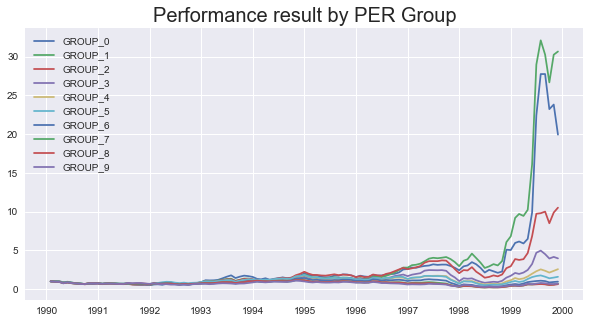

In [21]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

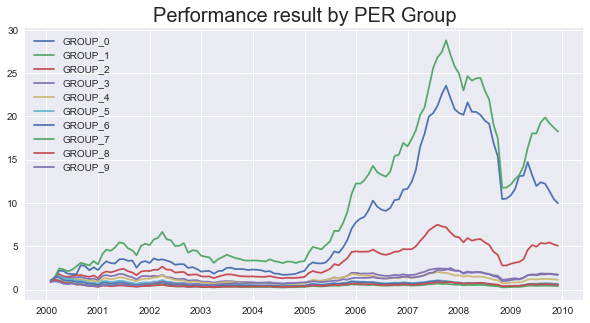

In [22]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

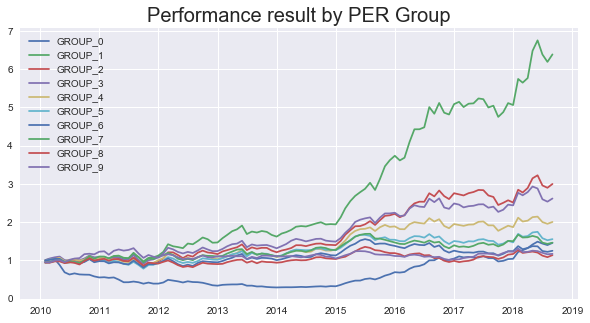

In [23]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

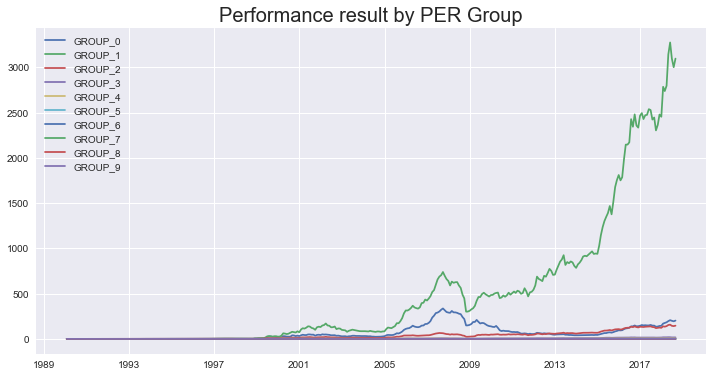

In [24]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

In [25]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.016,1.024,1.015,1.008,1.005,1.002,0.999,0.997,0.998,1.001
arith_mean_return,1.024,1.030,1.019,1.013,1.010,1.006,1.003,1.002,1.002,1.004
std,0.144,0.117,0.101,0.097,0.095,0.095,0.096,0.094,0.089,0.086
min,0.679,0.673,0.691,0.682,0.664,0.681,0.666,0.672,0.672,0.713
25%,0.957,0.970,0.966,0.960,0.956,0.960,0.954,0.955,0.953,0.958
50%,1.009,1.020,1.012,1.005,1.005,1.005,0.999,0.999,0.999,0.998
75%,1.069,1.075,1.063,1.058,1.056,1.050,1.047,1.049,1.045,1.047
max,2.270,1.799,1.468,1.448,1.474,1.469,1.491,1.590,1.454,1.517


In [24]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.020,1.023,1.015,1.008,1.005,1.002,0.999,0.997,0.998,1.001
arith_mean_return,1.028,1.029,1.020,1.013,1.010,1.006,1.003,1.002,1.002,1.004
std,0.145,0.117,0.102,0.097,0.095,0.095,0.096,0.094,0.090,0.086
min,0.683,0.673,0.691,0.682,0.664,0.681,0.666,0.672,0.672,0.713
25%,0.962,0.969,0.967,0.960,0.956,0.960,0.954,0.955,0.953,0.959
50%,1.011,1.020,1.012,1.004,1.005,1.005,0.999,1.001,1.000,0.997
75%,1.069,1.071,1.062,1.057,1.056,1.050,1.048,1.049,1.046,1.047
max,2.281,1.799,1.458,1.448,1.465,1.469,1.491,1.590,1.467,1.517
